In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the loan_data CSV (assuming it's in the same directory)
loan_data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
# Display first few rows and basic information for overview
print("First few rows of data:")
print(loan_data.head())
print("\nData Information:")
print(loan_data.info())

First few rows of data:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0 

In [4]:
# 1. Data Cleaning and Preparation
# Check for missing values
missing_values = loan_data.isnull().sum()
print("\nMissing Values in each column:")
print(missing_values)


Missing Values in each column:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [5]:
# Convert categorical columns to numerical codes
loan_data[' loan_status'] = loan_data[' loan_status'].astype('category').cat.codes
loan_data[' education'] = loan_data[' education'].astype('category').cat.codes
loan_data[' self_employed'] = loan_data[' self_employed'].astype('category').cat.codes

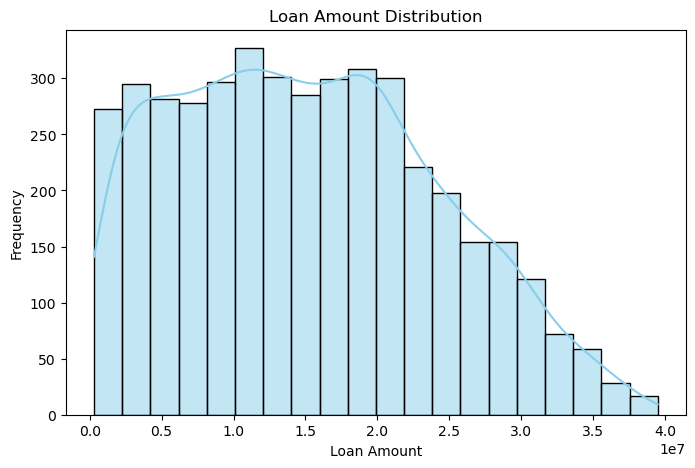

In [6]:
# 2. Visualisations
# Plot 1: Histogram for loan amount distribution
def plot_loan_amount_distribution():
    plt.figure(figsize=(8, 5))
    sns.histplot(loan_data[' loan_amount'], bins=20, kde=True, color='skyblue')
    plt.title("Loan Amount Distribution")
    plt.xlabel("Loan Amount")
    plt.ylabel("Frequency")
    plt.show()

plot_loan_amount_distribution()

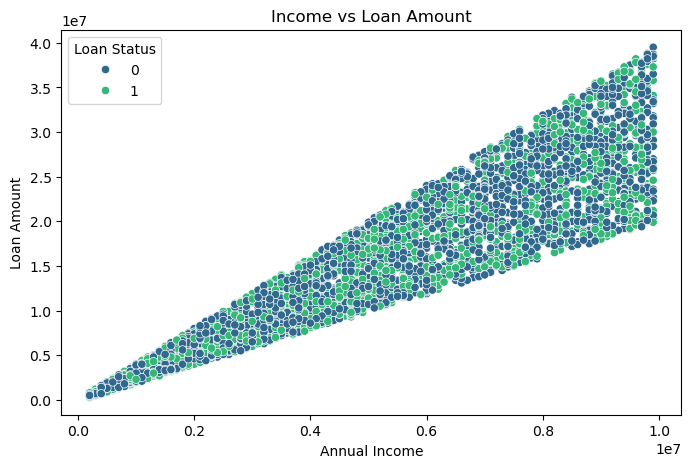

In [7]:
# Plot 2: Scatter plot to examine income vs. loan amount
def plot_income_vs_loan():
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=loan_data, x=' income_annum', y=' loan_amount', hue=' loan_status', palette='viridis')
    plt.title("Income vs Loan Amount")
    plt.xlabel("Annual Income")
    plt.ylabel("Loan Amount")
    plt.legend(title="Loan Status")
    plt.show()

plot_income_vs_loan()

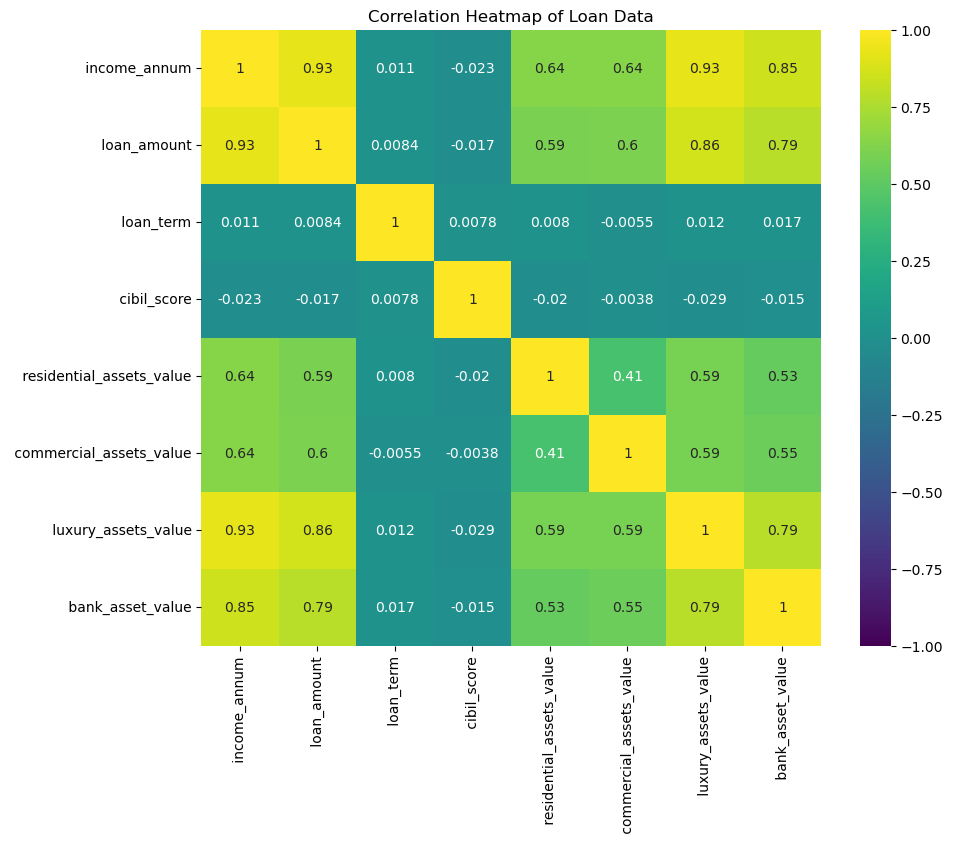

In [8]:
# Plot 3: Heatmap to show correlation between numerical variables
def plot_correlation_heatmap():
    plt.figure(figsize=(10, 8))
    correlation_matrix = loan_data[[' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
                             ' residential_assets_value', ' commercial_assets_value', 
                             ' luxury_assets_value', ' bank_asset_value']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
    plt.title("Correlation Heatmap of Loan Data")
    plt.show()

plot_correlation_heatmap()

In [9]:
# Additional Analysis: Summary Statistics and Correlation
summary_stats = loan_data.describe()

print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
           loan_id   no_of_dependents    education   self_employed  \
count  4269.000000        4269.000000  4269.000000     4269.000000   
mean   2135.000000           2.498712     0.497775        0.503631   
std    1232.498479           1.695910     0.500054        0.500045   
min       1.000000           0.000000     0.000000        0.000000   
25%    1068.000000           1.000000     0.000000        0.000000   
50%    2135.000000           3.000000     0.000000        1.000000   
75%    3202.000000           4.000000     1.000000        1.000000   
max    4269.000000           5.000000     1.000000        1.000000   

        income_annum   loan_amount    loan_term   cibil_score  \
count   4.269000e+03  4.269000e+03  4269.000000   4269.000000   
mean    5.059124e+06  1.513345e+07    10.900445    599.936051   
std     2.806840e+06  9.043363e+06     5.709187    172.430401   
min     2.000000e+05  3.000000e+05     2.000000    300.000000   
25%     2.700000e+06  7